<font color='blue'> # **Este projeto fictício analisa dados de vendas de uma empresa de eletrônicos com o objetivo de prever as vendas para o ano de 2016, utilizando quatro anos de dados históricos. Para o pré-processamento, foi aplicada a transformação por raiz cúbica para normalizar os dados, com a exclusão dos outliers, e a técnica de diferenciação (Differencing) para garantir que a série temporal se tornasse estacionária. Na etapa de previsão, utilizou-se o algoritmo Auto-ARIMA (SARIMA), que é capaz de capturar e modelar tanto as tendências quanto as sazonalidades presentes nos dados, fornecendo uma abordagem precisa e robusta para a projeção de vendas.** </font>


## **Carregando os Dados**

In [3]:
#Import dos pacotes numpy e pandas
import numpy as np
import pandas as pd

In [4]:
#Abrindo o arquivo com o pandas
path = ('Dados_Comerciais.xlsx')
df = pd.read_excel(path)
df = pd.DataFrame(df)
df.head()

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Comissão (Percentual),Data Venda,ValorVenda,Custo
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2,2012-10-04,679.00,345
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,3,2012-01-01,832.00,712
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2,2012-02-02,790.00,390
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,3,2012-03-03,765.32,200
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,5,2012-04-04,459.89,234


In [5]:
# Convertendo a coluna 'data' para o tipo datetime 
df['Data Venda'] = pd.to_datetime(df['Data Venda'])

In [6]:
df

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Comissão (Percentual),Data Venda,ValorVenda,Custo
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2,2012-10-04,679.00,345
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,3,2012-01-01,832.00,712
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2,2012-02-02,790.00,390
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,3,2012-03-03,765.32,200
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,5,2012-04-04,459.89,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,SKU-0000453,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2,2015-09-23,850.00,120
453,SKU-0000454,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2,2015-10-24,678.00,120
454,SKU-0000455,Morotola Moto G5,Celulares,Doméstico,Motorola,R1295,Rio de Janeiro,Rio de Janeiro,Aline Sutter,1008,2,2015-11-25,1230.00,120
455,SKU-0000456,Geladeira Duplex,Eletrodomésticos,Doméstico,LG,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2,2015-11-26,1234.00,120


## **Análise Exploratória**

In [8]:
#Informando o número de linhas e colunas
df.shape

(457, 14)

In [9]:
#Informando os tipos de dados
df.dtypes

ID-Produto                       object
Produto                          object
Categoria                        object
Segmento                         object
Fabricante                       object
Loja                             object
Cidade                           object
Estado                           object
Vendedor                         object
ID-Vendedor                       int64
Comissão (Percentual)             int64
Data Venda               datetime64[ns]
ValorVenda                      float64
Custo                             int64
dtype: object

In [10]:
df_Ajuste = df[['Data Venda','ValorVenda']]

In [11]:
df_Ajuste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data Venda  457 non-null    datetime64[ns]
 1   ValorVenda  457 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.3 KB


## **Verificando os valores de outliers**

In [13]:
# Calculando Q1, Q3 e IQR
Q1 = df_Ajuste['ValorVenda'].quantile(0.25)
Q3 = df_Ajuste['ValorVenda'].quantile(0.75)
IQR = Q3 - Q1

In [14]:
# Definindos os limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [15]:
# Identificando os outliers com a criação da coluna: Outlier
df_Ajuste = df_Ajuste.copy()  # Garante que você está trabalhando com uma cópia
df_Ajuste.loc[:, 'Outlier'] = (df_Ajuste['ValorVenda'] < limite_inferior) | (df_Ajuste['ValorVenda'] > limite_superior)
df_Ajuste

,Data Venda,ValorVenda,Outlier
0,2012-10-04,679.00,False
1,2012-01-01,832.00,False
2,2012-02-02,790.00,False
3,2012-03-03,765.32,False
4,2012-04-04,459.89,False
...,...,...,...
452,2015-09-23,850.00,False
453,2015-10-24,678.00,False
454,2015-11-25,1230.00,False
455,2015-11-26,1234.00,False


In [16]:
# Conta quantos valores são ou não outliers
df_Ajuste['Outlier'].value_counts()

Outlier
False    442
True      15
Name: count, dtype: int64

In [17]:
# Filtra apenas as linhas que são outliers
outliers = df_Ajuste[df_Ajuste['Outlier'] == True]
outliers

,Data Venda,ValorVenda,Outlier
147,2013-07-21,3999.0,True
150,2013-10-24,3999.0,True
154,2014-10-04,3999.0,True
156,2014-02-02,3999.0,True
157,2014-03-03,3999.0,True
158,2014-04-04,3999.0,True
159,2014-05-04,3999.0,True
169,2015-02-02,3999.0,True
170,2015-03-02,3999.0,True
171,2015-04-02,3999.0,True


In [18]:
# Filtra linhas que não são outliers
nao_outliers = df_Ajuste[df_Ajuste['Outlier'] == False]
nao_outliers

,Data Venda,ValorVenda,Outlier
0,2012-10-04,679.00,False
1,2012-01-01,832.00,False
2,2012-02-02,790.00,False
3,2012-03-03,765.32,False
4,2012-04-04,459.89,False
...,...,...,...
452,2015-09-23,850.00,False
453,2015-10-24,678.00,False
454,2015-11-25,1230.00,False
455,2015-11-26,1234.00,False


In [19]:
#Excluíndo apenas a linhas que possuem Outliers
# Removendo os índices de 147 a 177
ExclisaoOutliers = df_Ajuste.drop(index=range(147, 177))  # range(147, 177) inclui de 147 até 176

In [20]:
df_Ajuste = ExclisaoOutliers.copy()  # Garante que você está trabalhando com uma cópia
df_Ajuste.loc[:, 'Outlier'] = (ExclisaoOutliers['ValorVenda'] < limite_inferior) | (ExclisaoOutliers['ValorVenda'] > limite_superior)
df_Ajuste

,Data Venda,ValorVenda,Outlier
0,2012-10-04,679.00,False
1,2012-01-01,832.00,False
2,2012-02-02,790.00,False
3,2012-03-03,765.32,False
4,2012-04-04,459.89,False
...,...,...,...
452,2015-09-23,850.00,False
453,2015-10-24,678.00,False
454,2015-11-25,1230.00,False
455,2015-11-26,1234.00,False


In [21]:
#Visualização de Gráficos
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 4

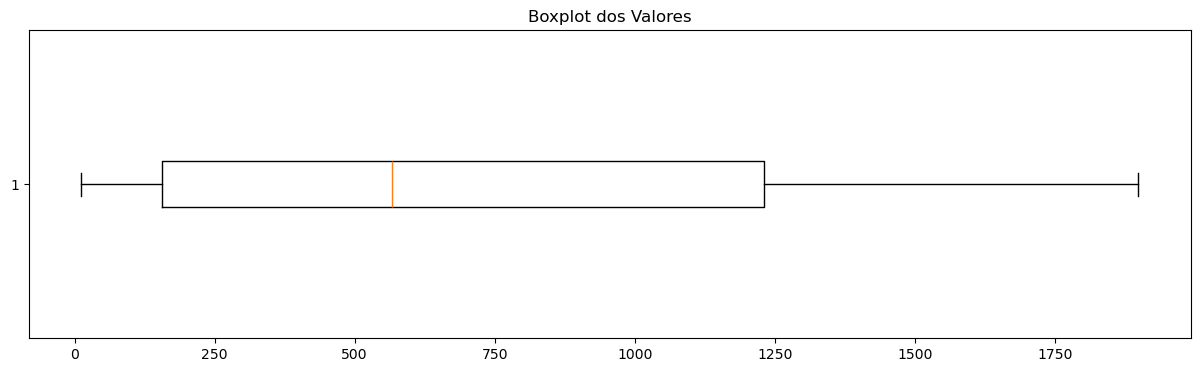

In [22]:

plt.boxplot(df_Ajuste['ValorVenda'], vert=False)
plt.title('Boxplot dos Valores')
plt.show()

## **Criação da Série**

In [24]:
# Converter o DataFrame em uma série temporal com a coluna Data Venda como índice
serie_temporal1 = df_Ajuste.set_index('Data Venda')['ValorVenda']

In [25]:
print(serie_temporal1.index)  # Verifica se o índice está correto

DatetimeIndex(['2012-10-04', '2012-01-01', '2012-02-02', '2012-03-03',
               '2012-04-04', '2012-05-04', '2012-06-04', '2012-07-04',
               '2012-08-04', '2012-09-04',
               ...
               '2015-05-18', '2015-05-19', '2015-06-20', '2015-07-21',
               '2015-07-22', '2015-09-23', '2015-10-24', '2015-11-25',
               '2015-11-26', '2015-11-27'],
              dtype='datetime64[ns]', name='Data Venda', length=427, freq=None)


In [26]:
type(serie_temporal1)

pandas.core.series.Series

In [27]:
serie_temporal1

Data Venda
2012-10-04     679.00
2012-01-01     832.00
2012-02-02     790.00
2012-03-03     765.32
2012-04-04     459.89
               ...   
2015-09-23     850.00
2015-10-24     678.00
2015-11-25    1230.00
2015-11-26    1234.00
2015-11-27    1234.00
Name: ValorVenda, Length: 427, dtype: float64

In [28]:
# Fornece a frequência da série temporal (Mensal, neste caso) acumulado.
serie_temporal1 = serie_temporal1.resample('ME').sum()
serie_temporal1

Data Venda
2012-01-31     2636.87
2012-02-29     2258.12
2012-03-31     2356.22
2012-04-30     3150.76
2012-05-31     2500.10
2012-06-30     2369.81
2012-07-31     3029.87
2012-08-31     3100.12
2012-09-30     5022.90
2012-10-31     3244.87
2012-11-30     4108.12
2012-12-31     3725.98
2013-01-31     7311.87
2013-02-28     7893.12
2013-03-31     8102.90
2013-04-30     8009.87
2013-05-31     8106.43
2013-06-30     7416.80
2013-07-31     5779.87
2013-08-31     4757.14
2013-09-30     4247.13
2013-10-31     6264.10
2013-11-30     5995.21
2013-12-31     6466.12
2014-01-31     4102.00
2014-02-28     3814.00
2014-03-31     2356.00
2014-04-30     2366.00
2014-05-31     2361.00
2014-06-30     2165.00
2014-07-31     2160.00
2014-08-31     1052.00
2014-09-30     1708.90
2014-10-31     3716.00
2014-11-30     3170.00
2014-12-31     4009.12
2015-01-31     9018.57
2015-02-28    10373.22
2015-03-31    13813.00
2015-04-30    12903.45
2015-05-31    15899.00
2015-06-30     9104.87
2015-07-31    10582.00


In [29]:
#Calculo da média anual
media_valor_venda = serie_temporal1.mean()
print('MÉDIA: {:.2f}'.format(media_valor_venda))

MÉDIA: 5887.92


In [30]:
print(serie_temporal1.index)  # Verifica se o índice está correto

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Data Venda', freq='ME')


In [31]:
type(serie_temporal1)

pandas.core.series.Series

In [32]:
# Confirma se há valores nulos
print(serie_temporal1.isnull().sum())  

0


In [33]:
# Substituindo vírgulas por pontos e convertendo para numérico
serie_temporal1 = serie_temporal1.replace({',': ''}, regex=True)  # Remove vírgulas de milhares, se necessário
serie_temporal1 = pd.to_numeric(serie_temporal1, errors='coerce')  # Converte para numérico
# Confirmando a conversão
print("Último valor de serie_temporal (corrigido):", serie_temporal1.iloc[-1])

Último valor de serie_temporal (corrigido): 8026.0


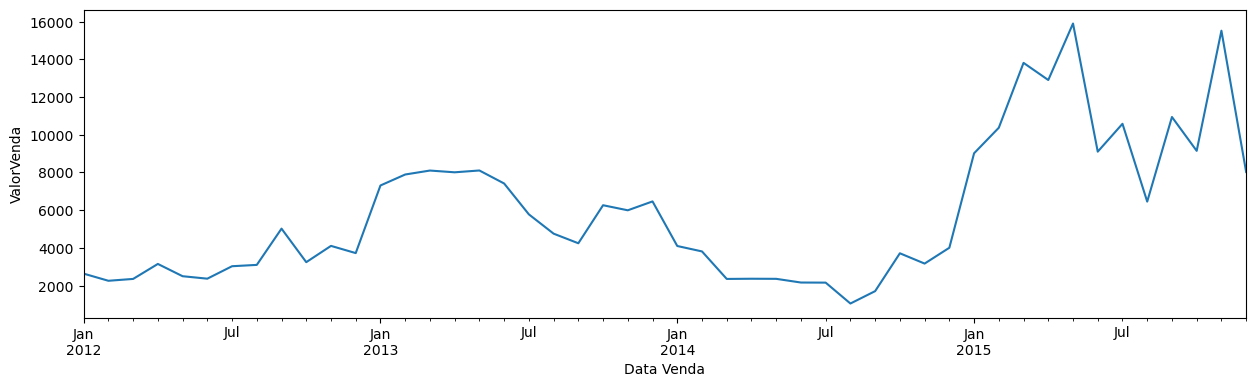

In [34]:
serie_temporal1.plot()
plt.xlabel('Data Venda')
plt.ylabel('ValorVenda')
plt.show()

## **Verificando se os dados são normalizados**

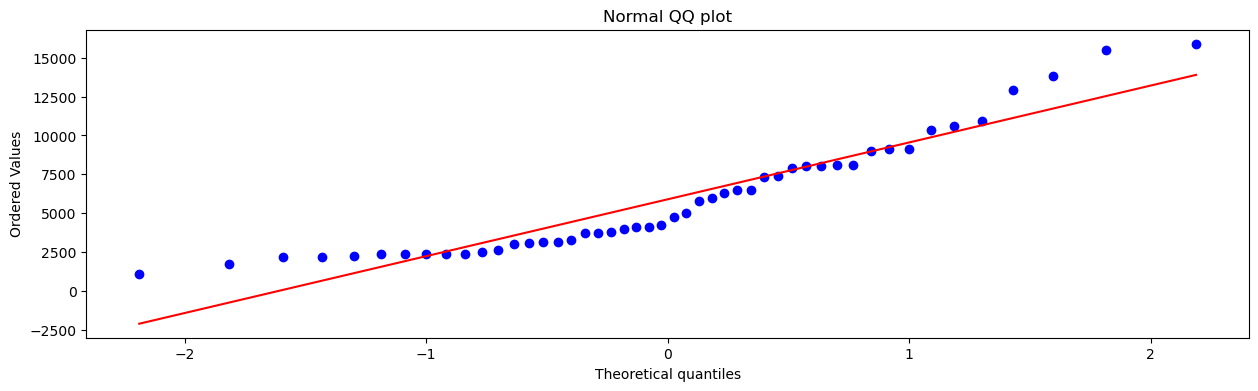

In [36]:
from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(serie_temporal1, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

**Teste Shapiro-Wilk**

CRITÉRIO**

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distriburo no**rmal).

In [38]:
# Executando o teste de Shapiro-Wilk para verificar a normalidade
e, p = stats.shapiro(serie_temporal1)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

# Avaliando o p-valor para decidir sobre a normalidade dos dados
if p > 0.05:
    print("Dados seguem uma distribuição normal")
else:
    print("Dados não seguem uma distribuição normal")

Estatística de teste: 0.8935322909869513
p-valor: 0.0003913520515824888
Dados não seguem uma distribuição normal


**Teste de Estacionaridade**

In [40]:
import statsmodels.tsa.stattools
import statsmodels.tsa.stattools as ts

**Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

Ha = não é estacionária: estatística do teste > valor crítico.

Ho = é estacionária: estatística do teste <= valor crítico.

In [42]:
# Realizando o teste KPSS
kpss_result = ts.kpss(serie_temporal1)

# Exibindo os resultados do teste
print('Estatística do teste: {:.4f}'.format(kpss_result[0]))
print('p_valor: {:.4f}'.format(kpss_result[1]))
print('Valores Críticos:')

# Iterando pelos valores críticos e verificando se a série é estacionária
for chave, valor in kpss_result[3].items():
    if kpss_result[0] > valor:
        print("Não é estacionária para o nível de significância de: {}=> {:.4f}".format(chave, valor))
    else:
        print("É estacionária para o nível de significância de: {}=> {:.4f}".format(chave, valor))

Estatística do teste: 0.4380
p_valor: 0.0608
Valores Críticos:
Não é estacionária para o nível de significância de: 10%=> 0.3470
É estacionária para o nível de significância de: 5%=> 0.4630
É estacionária para o nível de significância de: 2.5%=> 0.5740
É estacionária para o nível de significância de: 1%=> 0.7390


**Teste df (Dickey Fuller)**

Ho = não é estacionária: estatística do teste > valor críti.

Ha = é estacionária: estatística do teste <= valor crítico.

In [44]:
# Realizando o teste Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

df_result = adfuller(serie_temporal1)

# Exibindo os resultados do teste
print('Estatística do teste: {:.4f}'.format(df_result[0]))
print('p_valor: {:.4f}'.format(df_result[1]))
print('Valores Críticos:')

# Iterando pelos valores críticos e verificando se a série é estacionária
for chave, valor in df_result[4].items():
    if df_result[0] < valor:  
        print("É estacionária para o nível de significância de: {} => {:.4f}".format(chave, valor))
    else:
        print("Não é estacionária para o nível de significância de: {} => {:.4f}".format(chave, valor))


Estatística do teste: -3.5245
p_valor: 0.0074
Valores Críticos:
Não é estacionária para o nível de significância de: 1% => -3.6209
É estacionária para o nível de significância de: 5% => -2.9435
É estacionária para o nível de significância de: 10% => -2.6104


## **Análise e Preparação da Série**

**Decomposição**

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [48]:
decomposicao = seasonal_decompose(serie_temporal1)

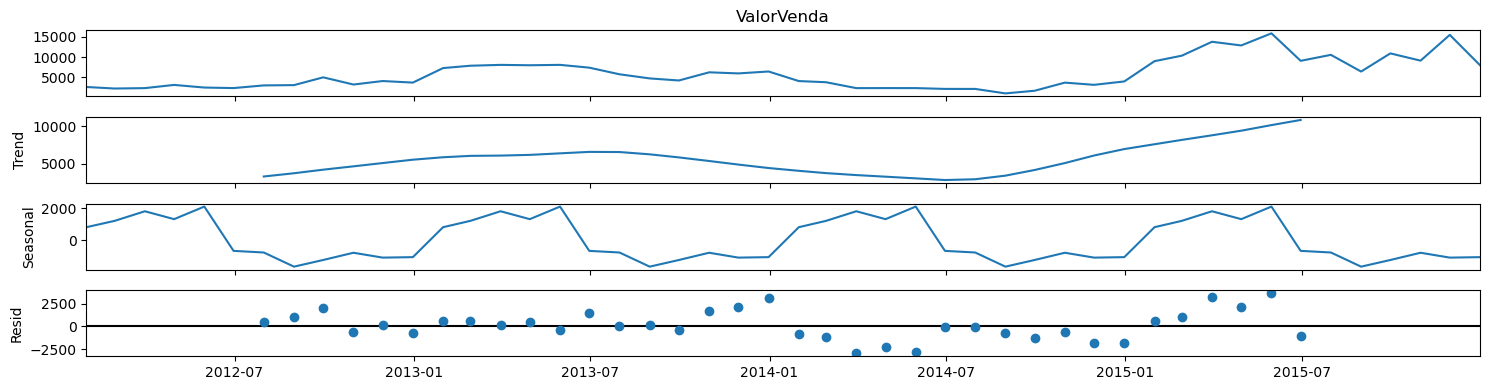

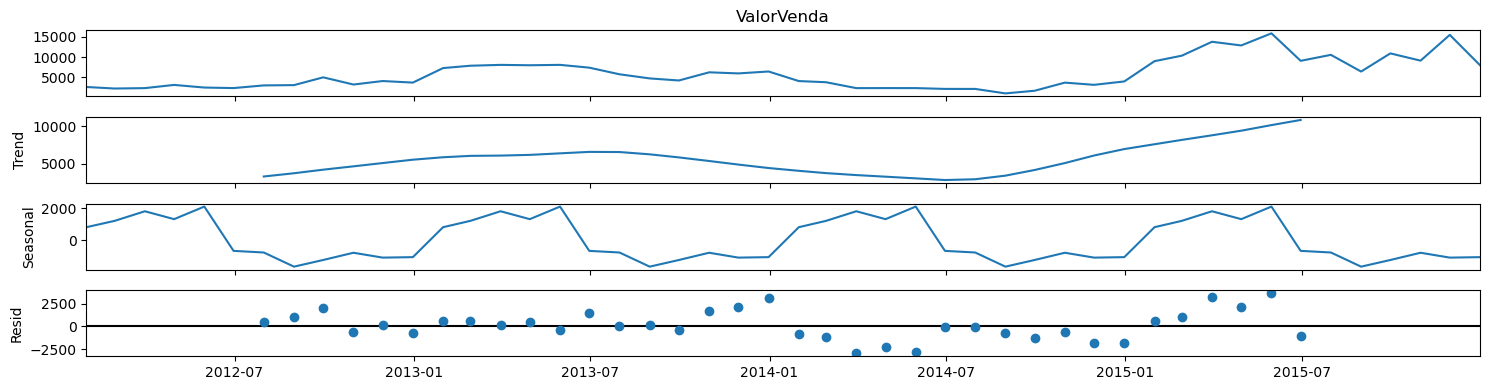

In [49]:
decomposicao.plot()

## **Realizando a normalidade e transformação dos dados**

In [51]:
# Transformação por raiz cúbica para normalizar os dados
serie_temporal2 = serie_temporal1 ** (1 / 3)
serie_temporal2

Data Venda
2012-01-31    13.815382
2012-02-29    13.119451
2012-03-31    13.306748
2012-04-30    14.660151
2012-05-31    13.572269
2012-06-30    13.332283
2012-07-31    14.470204
2012-08-31    14.581185
2012-09-30    17.125825
2012-10-31    14.804683
2012-11-30    16.015766
2012-12-31    15.502920
2013-01-31    19.409283
2013-02-28    19.910534
2013-03-31    20.085385
2013-04-30    20.008222
2013-05-31    20.088301
2013-06-30    19.501687
2013-07-31    17.946208
2013-08-31    16.818295
2013-09-30    16.194412
2013-10-31    18.433999
2013-11-30    18.166369
2013-12-31    18.630074
2014-01-31    16.007809
2014-02-28    15.624048
2014-03-31    13.306334
2014-04-30    13.325134
2014-05-31    13.315741
2014-06-30    12.936575
2014-07-31    12.926608
2014-08-31    10.170413
2014-09-30    11.955623
2014-10-31    15.489066
2014-11-30    14.689931
2014-12-31    15.886066
2015-01-31    20.815135
2015-02-28    21.809106
2015-03-31    23.993633
2015-04-30    23.454992
2015-05-31    25.145287
2015-

In [52]:
# Executando o teste de Shapiro-Wilk para verificar a normalidade
e, p = stats.shapiro(serie_temporal2)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

# Avaliando o p-valor para decidir sobre a normalidade dos dados
if p > 0.05:
    print("Dados seguem uma distribuição normal")
else:
    print("Dados não seguem uma distribuição normal")

Estatística de teste: 0.9595918070493302
p-valor: 0.09719432403017508
Dados seguem uma distribuição normal


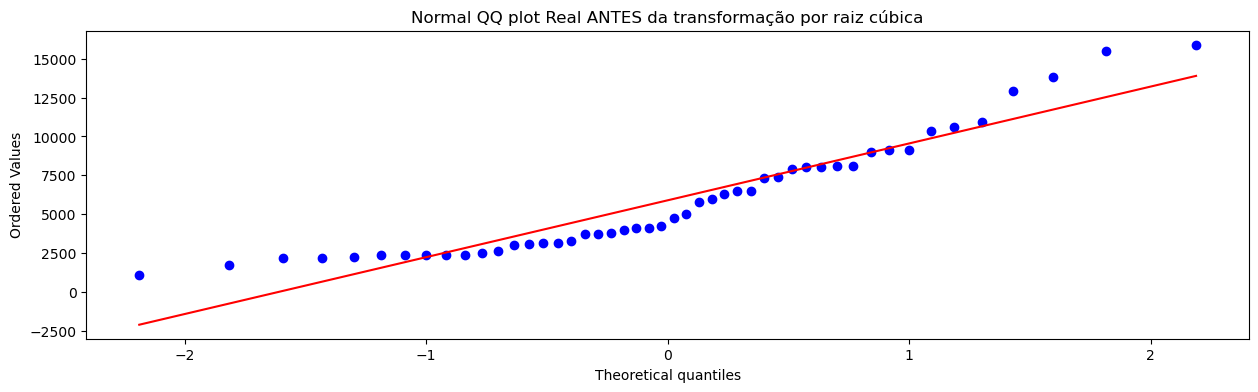

In [53]:
stats.probplot(serie_temporal1, dist="norm", plot=plt)
plt.title("Normal QQ plot Real ANTES da transformação por raiz cúbica")
plt.show()

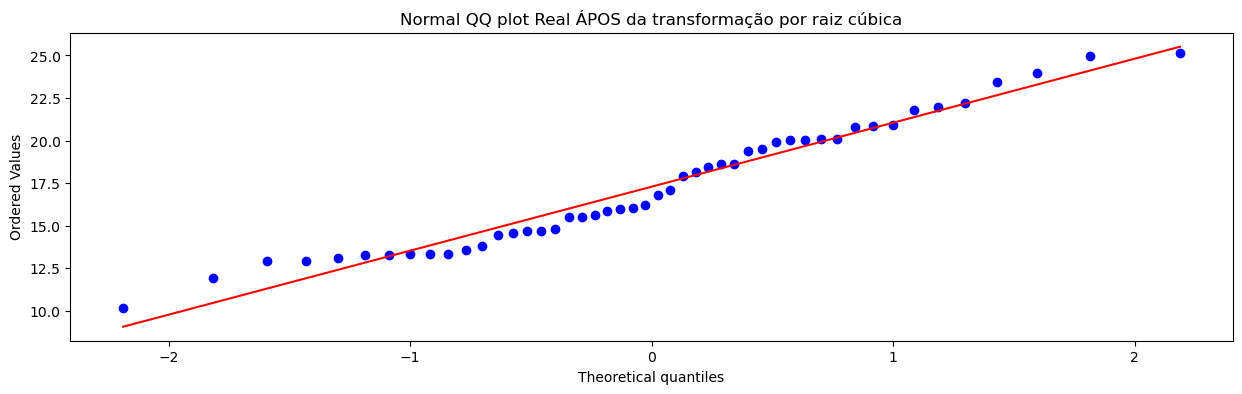

In [54]:
stats.probplot(serie_temporal2, dist="norm", plot=plt)
plt.title("Normal QQ plot Real ÁPOS da transformação por raiz cúbica")
plt.show()

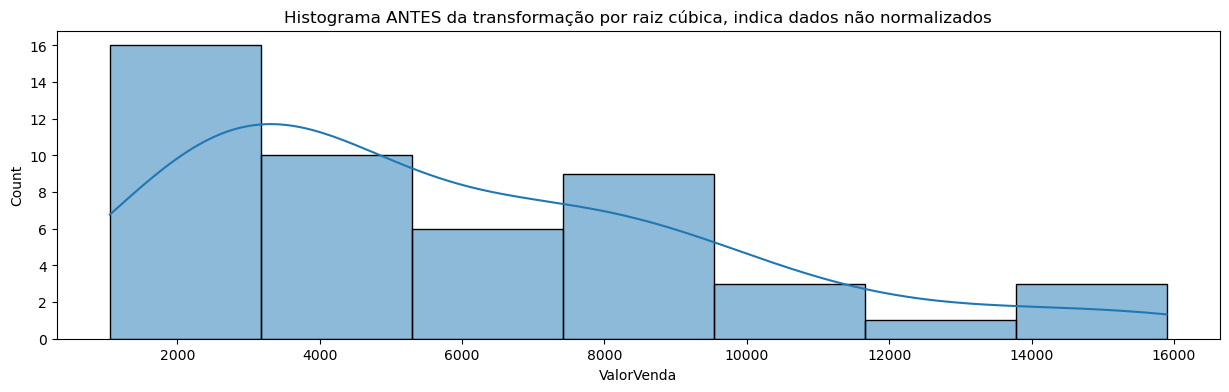

In [55]:
import seaborn as sns
sns.histplot(serie_temporal1, kde=True)
plt.title('Histograma ANTES da transformação por raiz cúbica, indica dados não normalizados')
plt.show()

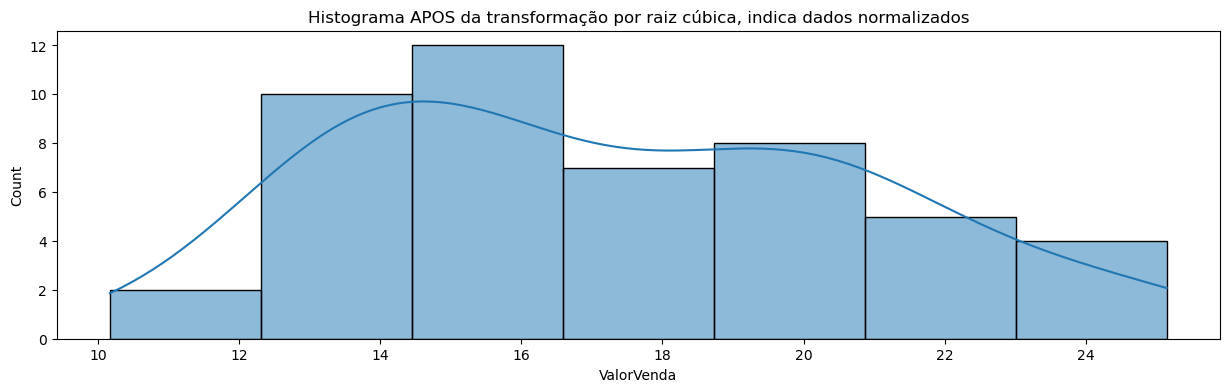

In [56]:
sns.histplot(serie_temporal2, kde=True)
plt.title('Histograma APOS da transformação por raiz cúbica, indica dados normalizados')
plt.show()

**Teste de Estacionaridade APOS a transformação por raiz cúbica**

In [58]:
# Realizando o teste KPSS
kpss_result = ts.kpss(serie_temporal2)

# Exibindo os resultados do teste
print('Estatística do teste: {:.4f}'.format(kpss_result[0]))
print('p_valor: {:.4f}'.format(kpss_result[1]))
print('Valores Críticos:')

# Iterando pelos valores críticos e verificando se a série é estacionária
for chave, valor in kpss_result[3].items():
    if kpss_result[0] > valor:
        print("Não é estacionária para o nível de significância de: {}=> {:.4f}".format(chave, valor))
    else:
        print("É estacionária para o nível de significância de: {}=> {:.4f}".format(chave, valor))

Estatística do teste: 0.3557
p_valor: 0.0963
Valores Críticos:
Não é estacionária para o nível de significância de: 10%=> 0.3470
É estacionária para o nível de significância de: 5%=> 0.4630
É estacionária para o nível de significância de: 2.5%=> 0.5740
É estacionária para o nível de significância de: 1%=> 0.7390


In [59]:
# Realizando o teste Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

df_result = adfuller(serie_temporal2)

# Exibindo os resultados do teste
print('Estatística do teste: {:.4f}'.format(df_result[0]))
print('p_valor: {:.4f}'.format(df_result[1]))
print('Valores Críticos:')

# Iterando pelos valores críticos e verificando se a série é estacionária
for chave, valor in df_result[4].items():
    if df_result[0] < valor:  
        print("É estacionária para o nível de significância de: {} => {:.4f}".format(chave, valor))
    else:
        print("Não é estacionária para o nível de significância de: {} => {:.4f}".format(chave, valor))

Estatística do teste: -2.1261
p_valor: 0.2341
Valores Críticos:
Não é estacionária para o nível de significância de: 1% => -3.5925
Não é estacionária para o nível de significância de: 5% => -2.9315
Não é estacionária para o nível de significância de: 10% => -2.6041


**Verificado que os dados estão normalizados, porém ao aplicar os testes de estacionaridade: (KPSS e Dickey-Fuller) os dados não são estacionários**.

**A técnica de Diferenciação será usada para fazer com que o modelo se torne estacionár**o.

In [62]:
serie_temporal2_diff = serie_temporal2.diff().dropna()
print(serie_temporal2_diff)

Data Venda
2012-02-29   -0.695931
2012-03-31    0.187297
2012-04-30    1.353402
2012-05-31   -1.087882
2012-06-30   -0.239986
2012-07-31    1.137922
2012-08-31    0.110981
2012-09-30    2.544640
2012-10-31   -2.321143
2012-11-30    1.211083
2012-12-31   -0.512846
2013-01-31    3.906363
2013-02-28    0.501251
2013-03-31    0.174851
2013-04-30   -0.077163
2013-05-31    0.080080
2013-06-30   -0.586614
2013-07-31   -1.555480
2013-08-31   -1.127912
2013-09-30   -0.623883
2013-10-31    2.239587
2013-11-30   -0.267630
2013-12-31    0.463705
2014-01-31   -2.622266
2014-02-28   -0.383761
2014-03-31   -2.317714
2014-04-30    0.018800
2014-05-31   -0.009393
2014-06-30   -0.379166
2014-07-31   -0.009967
2014-08-31   -2.756195
2014-09-30    1.785210
2014-10-31    3.533443
2014-11-30   -0.799135
2014-12-31    1.196135
2015-01-31    4.929069
2015-02-28    0.993971
2015-03-31    2.184527
2015-04-30   -0.538641
2015-05-31    1.690296
2015-06-30   -4.263969
2015-07-31    1.073133
2015-08-31   -3.334101


In [63]:
# Realizando o teste KPSS
kpss_result = ts.kpss(serie_temporal2_diff)

# Exibindo os resultados do teste
print('Estatística do teste: {:.4f}'.format(kpss_result[0]))
print('p_valor: {:.4f}'.format(kpss_result[1]))
print('Valores Críticos:')

# Iterando pelos valores críticos e verificando se a série é estacionária
for chave, valor in kpss_result[3].items():
    if kpss_result[0] > valor:
        print("Não é estacionária para o nível de significância de: {}=> {:.4f}".format(chave, valor))
    else:
        print("É estacionária para o nível de significância de: {}=> {:.4f}".format(chave, valor))

Estatística do teste: 0.0700
p_valor: 0.1000
Valores Críticos:
É estacionária para o nível de significância de: 10%=> 0.3470
É estacionária para o nível de significância de: 5%=> 0.4630
É estacionária para o nível de significância de: 2.5%=> 0.5740
É estacionária para o nível de significância de: 1%=> 0.7390


C:\Users\ferna\AppData\Local\Temp\ipykernel_4708\2353178766.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = ts.kpss(serie_temporal2_diff)


In [64]:
#Realizando o teste Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

df_result = adfuller(serie_temporal2_diff)

# Exibindo os resultados do teste
print('Estatística do teste: {:.4f}'.format(df_result[0]))
print('p_valor: {:.4f}'.format(df_result[1]))
print('Valores Críticos:')

# Iterando pelos valores críticos e verificando se a série é estacionária
for chave, valor in df_result[4].items():
    if df_result[0] < valor:  
        print("É estacionária para o nível de significância de: {} => {:.4f}".format(chave, valor))
    else:
        print("Não é estacionária para o nível de significância de: {} => {:.4f}".format(chave, valor))

Estatística do teste: -3.9525
p_valor: 0.0017
Valores Críticos:
É estacionária para o nível de significância de: 1% => -3.5886
É estacionária para o nível de significância de: 5% => -2.9299
É estacionária para o nível de significância de: 10% => -2.6032


**Autocorrelação**

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

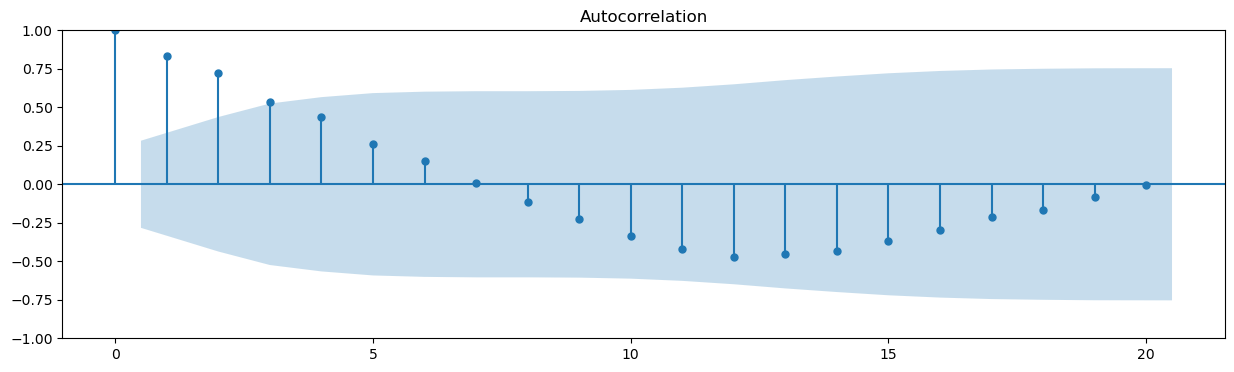

In [67]:
#Sem a difereciação
plot_acf(serie_temporal2, lags=20)
plt.show()

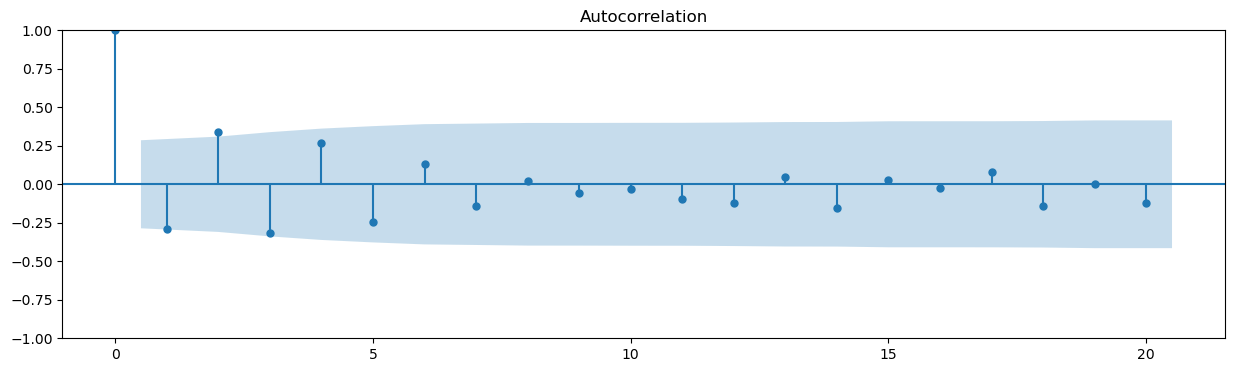

In [68]:
plot_acf(serie_temporal2_diff, lags=20)
plt.show()

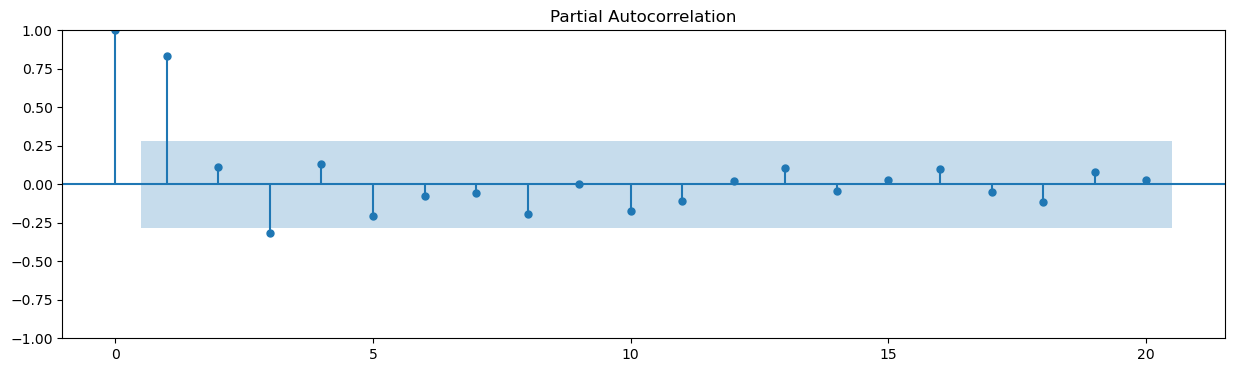

In [69]:
#Sem a difereciação
plot_pacf(serie_temporal2, lags=20)
plt.show()

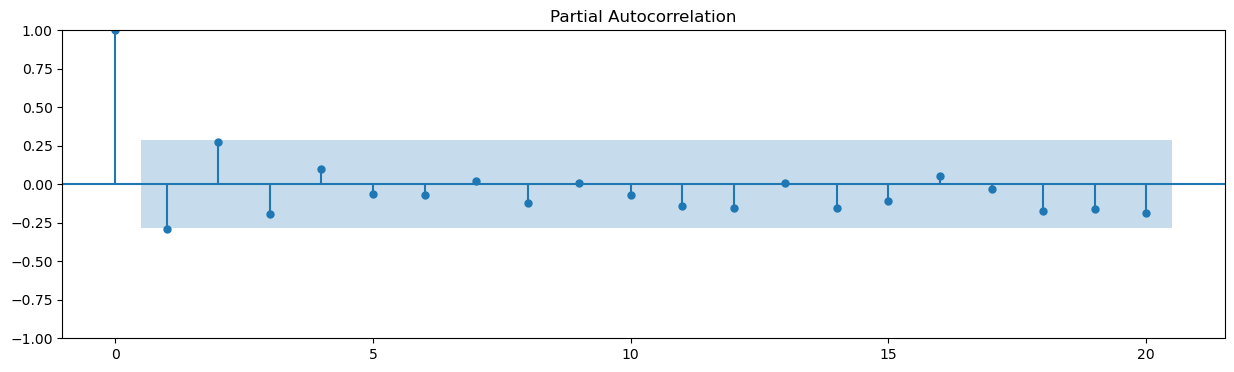

In [70]:
plot_pacf(serie_temporal2_diff, lags=20)
plt.show()

## **Modelo AUTO ARIMA**

In [72]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [73]:
from pmdarima.arima import auto_arima

In [74]:
### AUTOARIMA
#modelo_auto = auto_arima(serie_temporal2_diff, trace = True, stepwise = False, seasonal=True, max_p=10, max_q=10,
                          #max_P=4, max_Q=4, start_p=0, start_q=0, start_P=0, start_Q=0, m=12,)

modelo_auto = auto_arima(serie_temporal2_diff,trace=True,stepwise=True,seasonal=True,m=12,start_p=1, start_q=1,start_P=1, start_Q=1,max_p=5, 
                         max_q=5,max_P=2, max_Q=2,d=None, D=None,max_order=None)



    #stepwise=True,               # Busca passo a passo para otimização de tempo
    #seasonal=True,               # Mantém sazonalidade ativa
    #m=12,                        # Sazonalidade mensal confirmada
    #start_p=1, start_q=1,        # Valores iniciais baseados em ACF/PACF
    #start_P=1, start_Q=1,        # Valores iniciais para sazonalidade
    #max_p=5, max_q=5,            # Limita os valores máximos para não-sazonal
    #max_P=2, max_Q=2,            # Limita os valores máximos para sazonalidade
    #d=None, D=None,              # Permite que o auto_arima identifique diferenças necessárias
    #max_order=None               # Não limita o somatório dos parâmetros



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=205.310, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=203.430, Time=0.03 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=205.409, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=203.503, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=202.517, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=203.801, Time=0.01 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=204.362, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=199.327, Time=0.03 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=201.213, Time=0.04 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=201.250, Time=0.03 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=198.794, Time=0.03 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=200.486, Time=0.03 sec
 ARIMA(3,0,0)(0,0,1)[12] intercept   : AI

In [75]:
print('Melhor modelo: ', modelo_auto.aic())

Melhor modelo:  195.34728669498443


In [76]:
resultado_auto = modelo_auto.fit(serie_temporal2_diff)
print(resultado_auto.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   47
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -94.674
Date:                Mon, 30 Dec 2024   AIC                            195.347
Time:                        14:54:43   BIC                            200.898
Sample:                    02-29-2012   HQIC                           197.436
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9498      0.147     -6.455      0.000      -1.238      -0.661
ma.L1          0.7103      0.251      2.835      0.005       0.219       1.201
sigma2         3.2355      0.658      4.920      0.0

**Análise dos Resíduos**

In [78]:
residuos_auto = resultado_auto.resid
residuos_auto()

Data Venda
2012-02-29   -0.695931
2012-03-31   -0.161846
2012-04-30    1.628200
2012-05-31   -0.874111
2012-06-30   -0.674492
2012-07-31    1.380617
2012-08-31    0.219735
2012-09-30    2.494657
2012-10-31   -1.672385
2012-11-30    0.193143
2012-12-31    0.500279
2013-01-31    3.064024
2013-02-28    2.035235
2013-03-31   -0.794648
2013-04-30    0.653339
2013-05-31   -0.457280
2013-06-30   -0.185744
2013-07-31   -1.980686
2013-08-31   -1.198325
2013-09-30   -0.843935
2013-10-31    2.246512
2013-11-30    0.263697
2013-12-31    0.022211
2014-01-31   -2.197633
2014-02-28   -1.313260
2014-03-31   -1.749357
2014-04-30   -0.939869
2014-05-31    0.676072
2014-06-30   -0.868317
2014-07-31    0.246701
2014-08-31   -2.940898
2014-09-30    1.256468
2014-10-31    4.336470
2014-11-30   -0.523499
2014-12-31    0.808999
2015-01-31    5.490462
2015-02-28    1.775414
2015-03-31    1.867446
2015-04-30    0.209650
2015-05-31    1.029796
2015-06-30   -3.390078
2015-07-31   -0.568573
2015-08-31   -1.911010


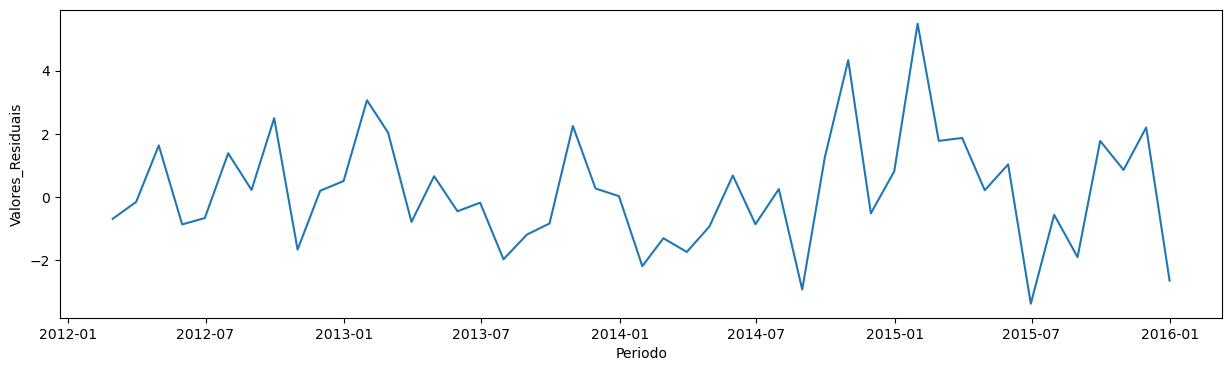

In [79]:
plt.plot(residuos_auto())
plt.xlabel('Periodo')
plt.ylabel('Valores_Residuais')
plt.show()

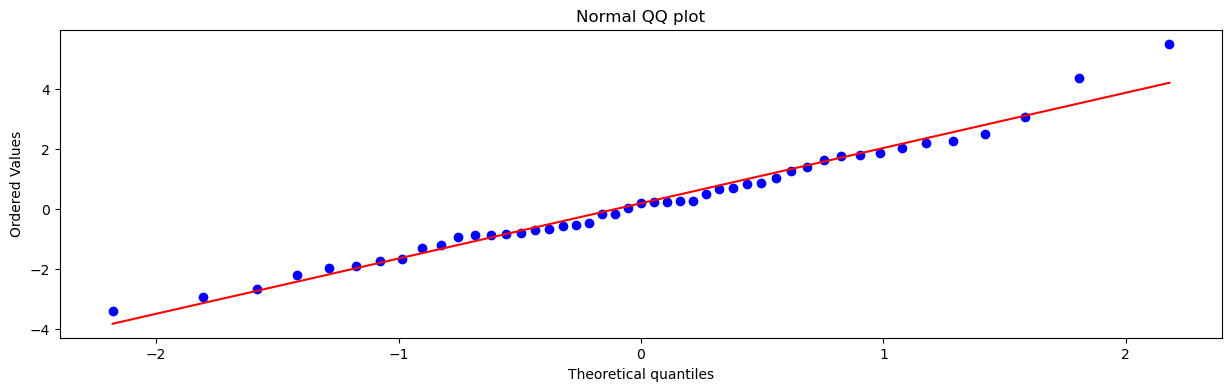

In [80]:
#Seguem uma normalidade apos a aplicação do Auto Arima
stats.probplot(residuos_auto(), dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [81]:
e, p = stats.shapiro(residuos_auto())
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))
# Avaliando o p-valor para decidir sobre a normalidade dos dados
if p > 0.05:
    print("Dados seguem uma distribuição normal")
else:
    print("Dados não seguem uma distribuição normal")

Estatística de teste: 0.9789330141569853
p-valor: 0.5489165334835622
Dados seguem uma distribuição normal


**Autocorrelação**

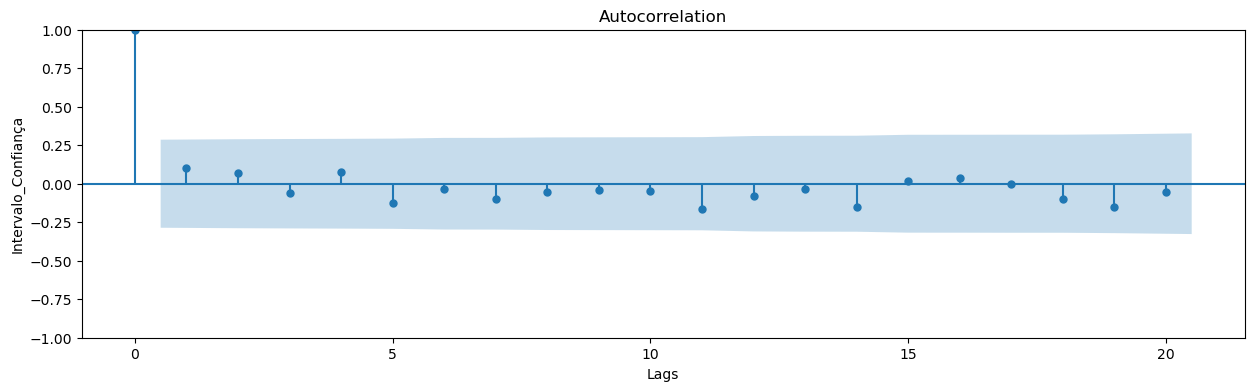

In [83]:
plot_acf(residuos_auto(), lags=20)
plt.xlabel('Lags')
plt.ylabel('Intervalo_Confiança')
plt.show()

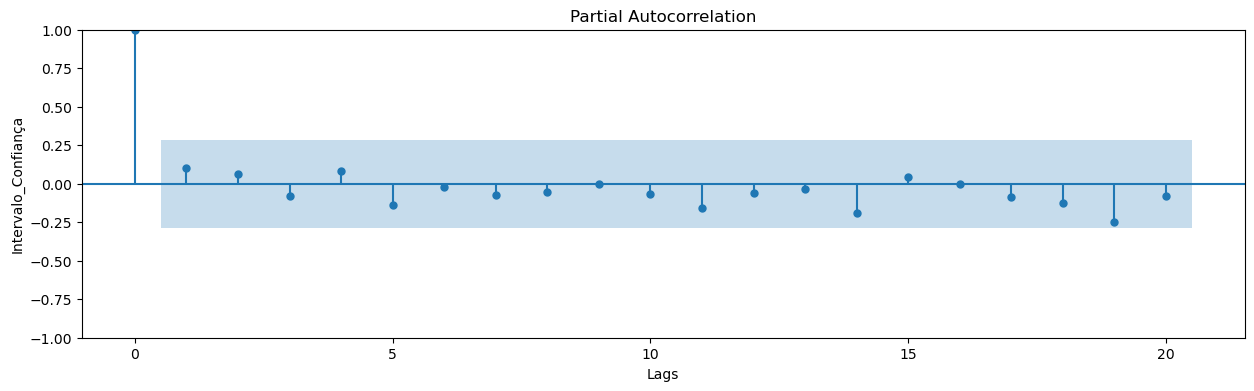

In [84]:
plot_pacf(residuos_auto(), lags=20)
plt.xlabel('Lags')
plt.ylabel('Intervalo_Confiança')
plt.show()

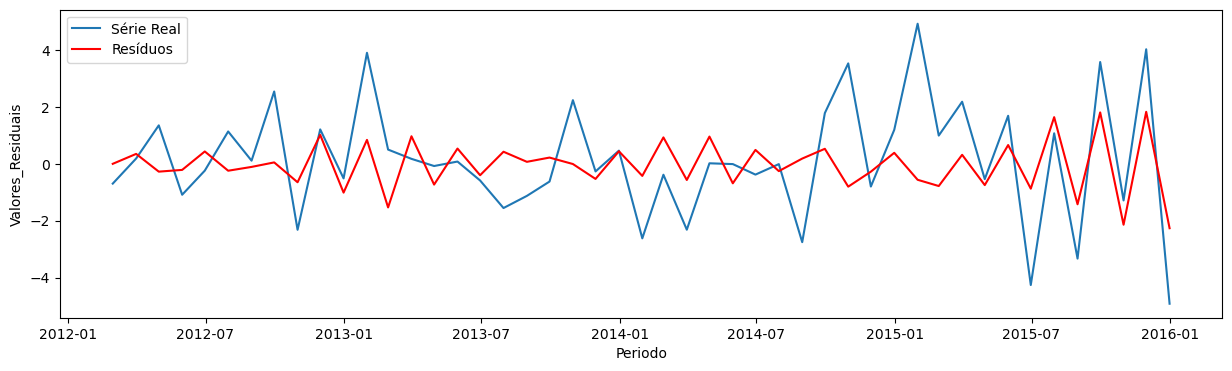

In [85]:
plt.plot(serie_temporal2_diff, label='Série Real')
plt.plot(serie_temporal2_diff-residuos_auto(),color='red', label='Resíduos')
plt.xlabel('Periodo')
plt.ylabel('Valores_Residuais')
plt.legend(loc='best')
plt.show()

**Previsão**

In [87]:
previsao_auto = resultado_auto.predict(n_periods=12)
previsao_auto

2016-01-31    2.787304
2016-02-29   -2.647275
2016-03-31    2.514281
2016-04-30   -2.387968
2016-05-31    2.268001
2016-06-30   -2.154061
2016-07-31    2.045845
2016-08-31   -1.943066
2016-09-30    1.845450
2016-10-31   -1.752738
2016-11-30    1.664683
2016-12-31   -1.581053
Freq: ME, dtype: float64

## **Reversão da previsão para a escala original**

In [89]:
#Dados originais sem a diferenciação
serie_temporal1

Data Venda
2012-01-31     2636.87
2012-02-29     2258.12
2012-03-31     2356.22
2012-04-30     3150.76
2012-05-31     2500.10
2012-06-30     2369.81
2012-07-31     3029.87
2012-08-31     3100.12
2012-09-30     5022.90
2012-10-31     3244.87
2012-11-30     4108.12
2012-12-31     3725.98
2013-01-31     7311.87
2013-02-28     7893.12
2013-03-31     8102.90
2013-04-30     8009.87
2013-05-31     8106.43
2013-06-30     7416.80
2013-07-31     5779.87
2013-08-31     4757.14
2013-09-30     4247.13
2013-10-31     6264.10
2013-11-30     5995.21
2013-12-31     6466.12
2014-01-31     4102.00
2014-02-28     3814.00
2014-03-31     2356.00
2014-04-30     2366.00
2014-05-31     2361.00
2014-06-30     2165.00
2014-07-31     2160.00
2014-08-31     1052.00
2014-09-30     1708.90
2014-10-31     3716.00
2014-11-30     3170.00
2014-12-31     4009.12
2015-01-31     9018.57
2015-02-28    10373.22
2015-03-31    13813.00
2015-04-30    12903.45
2015-05-31    15899.00
2015-06-30     9104.87
2015-07-31    10582.00


In [90]:
#Dados com a diferenciação aplicada
serie_temporal2_diff

Data Venda
2012-02-29   -0.695931
2012-03-31    0.187297
2012-04-30    1.353402
2012-05-31   -1.087882
2012-06-30   -0.239986
2012-07-31    1.137922
2012-08-31    0.110981
2012-09-30    2.544640
2012-10-31   -2.321143
2012-11-30    1.211083
2012-12-31   -0.512846
2013-01-31    3.906363
2013-02-28    0.501251
2013-03-31    0.174851
2013-04-30   -0.077163
2013-05-31    0.080080
2013-06-30   -0.586614
2013-07-31   -1.555480
2013-08-31   -1.127912
2013-09-30   -0.623883
2013-10-31    2.239587
2013-11-30   -0.267630
2013-12-31    0.463705
2014-01-31   -2.622266
2014-02-28   -0.383761
2014-03-31   -2.317714
2014-04-30    0.018800
2014-05-31   -0.009393
2014-06-30   -0.379166
2014-07-31   -0.009967
2014-08-31   -2.756195
2014-09-30    1.785210
2014-10-31    3.533443
2014-11-30   -0.799135
2014-12-31    1.196135
2015-01-31    4.929069
2015-02-28    0.993971
2015-03-31    2.184527
2015-04-30   -0.538641
2015-05-31    1.690296
2015-06-30   -4.263969
2015-07-31    1.073133
2015-08-31   -3.334101


In [91]:
# Reversão (após o modelo AUTO_ARIMA e diferenciação)
previsao_auto = resultado_auto.predict(n_periods=12)
# Último valor da série transformada (raiz cúbica)
ultimo_valor_raiz_cubica = serie_temporal2.iloc[-1]  # Último valor na escala da raiz cúbica
# Reversão da diferenciação: soma cumulativa das previsões + último valor conhecido
previsoes_cumulativas = previsao_auto.cumsum() + ultimo_valor_raiz_cubica
# Reversão da transformação por raiz cúbica: eleva ao cubo
previsoes_originais = previsoes_cumulativas ** 3
# Exibe resultados
print("Resultado da previsão:")
print(previsao_auto)
print("\nPrevisões cumulativas (raiz cúbica):")
print(previsoes_cumulativas)
print("\nPrevisões na escala original:")
print(previsoes_originais)


Resultado da previsão:
2016-01-31    2.787304
2016-02-29   -2.647275
2016-03-31    2.514281
2016-04-30   -2.387968
2016-05-31    2.268001
2016-06-30   -2.154061
2016-07-31    2.045845
2016-08-31   -1.943066
2016-09-30    1.845450
2016-10-31   -1.752738
2016-11-30    1.664683
2016-12-31   -1.581053
Freq: ME, dtype: float64

Previsões cumulativas (raiz cúbica):
2016-01-31    22.808947
2016-02-29    20.161672
2016-03-31    22.675953
2016-04-30    20.287985
2016-05-31    22.555986
2016-06-30    20.401925
2016-07-31    22.447770
2016-08-31    20.504705
2016-09-30    22.350154
2016-10-31    20.597416
2016-11-30    22.262100
2016-12-31    20.681047
Freq: ME, dtype: float64

Previsões na escala original:
2016-01-31    11866.310982
2016-02-29     8195.579110
2016-03-31    11659.949077
2016-04-30     8350.581939
2016-05-31    11475.865651
2016-06-30     8492.067649
2016-07-31    11311.484855
2016-08-31     8621.057564
2016-09-30    11164.558858
2016-10-31     8738.527331
2016-11-30    11033.1209

In [92]:
previsoes_originais = pd.DataFrame(previsoes_originais)
indice_datas = pd.date_range(start='2016-01-31', periods=len(previsoes_originais), freq='ME')
previsoes_originais.index = indice_datas
previsoes_originais.columns = ['Data Venda']
previsoes_originais.columns = ['ValorVenda']
previsoes_originais

,ValorVenda
2016-01-31,11866.310982
2016-02-29,8195.579110
2016-03-31,11659.949077
2016-04-30,8350.581939
2016-05-31,11475.865651
2016-06-30,8492.067649
2016-07-31,11311.484855
2016-08-31,8621.057564
2016-09-30,11164.558858
2016-10-31,8738.527331


In [93]:
serie_temporal1 = pd.DataFrame(serie_temporal1)
indice_datas = pd.date_range(start='2012-01-31', periods=len(serie_temporal1), freq='ME')
serie_temporal1.index = indice_datas
serie_temporal1.columns = ['Data Venda']
serie_temporal1.columns = ['ValorVenda']
serie_temporal1

,ValorVenda
2012-01-31,2636.87
2012-02-29,2258.12
2012-03-31,2356.22
2012-04-30,3150.76
2012-05-31,2500.10
2012-06-30,2369.81
2012-07-31,3029.87
2012-08-31,3100.12
2012-09-30,5022.90
2012-10-31,3244.87


In [94]:
seriecomprevisao = pd.concat([serie_temporal1, previsoes_originais], axis=0,ignore_index=True)
seriecomprevisao

,ValorVenda
0,2636.870000
1,2258.120000
2,2356.220000
3,3150.760000
4,2500.100000
5,2369.810000
6,3029.870000
7,3100.120000
8,5022.900000
9,3244.870000


In [95]:
previsoes_originais.index = range(59, len(previsoes_originais)+59)
previsoes_originais

,ValorVenda
59,11866.310982
60,8195.579110
61,11659.949077
62,8350.581939
63,11475.865651
64,8492.067649
65,11311.484855
66,8621.057564
67,11164.558858
68,8738.527331


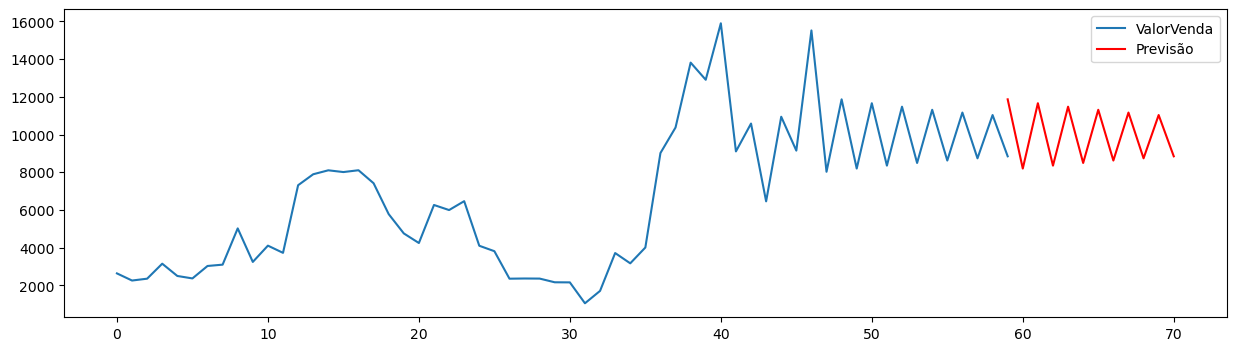

In [96]:
seriecomprevisao.plot()
plt.plot(previsoes_originais, color='red', label='Previsão')
plt.legend(loc='best')
plt.show()

In [97]:
serie_temporal1 = pd.DataFrame(serie_temporal1)
indice_datas = pd.date_range(start='2012-01-31', periods=len(serie_temporal1), freq='ME')
#serie_temporal1.index = indice_datas
serie_temporal1.columns = ['Data Venda']
serie_temporal1.columns = ['ValorVenda']
serie_temporal1

,ValorVenda
2012-01-31,2636.87
2012-02-29,2258.12
2012-03-31,2356.22
2012-04-30,3150.76
2012-05-31,2500.10
2012-06-30,2369.81
2012-07-31,3029.87
2012-08-31,3100.12
2012-09-30,5022.90
2012-10-31,3244.87


In [98]:
previsoes_originais = pd.DataFrame(previsoes_originais)
indice_datas = pd.date_range(start='2016-01-31', periods=len(previsoes_originais), freq='ME')
previsoes_originais.index = indice_datas
previsoes_originais.columns = ['Data Venda']
previsoes_originais.columns = ['ValorVenda']
previsoes_originais

,ValorVenda
2016-01-31,11866.310982
2016-02-29,8195.579110
2016-03-31,11659.949077
2016-04-30,8350.581939
2016-05-31,11475.865651
2016-06-30,8492.067649
2016-07-31,11311.484855
2016-08-31,8621.057564
2016-09-30,11164.558858
2016-10-31,8738.527331


In [99]:
seriecomprevisao = pd.concat([serie_temporal1, previsoes_originais], axis=0,ignore_index=False)
seriecomprevisao

,ValorVenda
2012-01-31,2636.870000
2012-02-29,2258.120000
2012-03-31,2356.220000
2012-04-30,3150.760000
2012-05-31,2500.100000
2012-06-30,2369.810000
2012-07-31,3029.870000
2012-08-31,3100.120000
2012-09-30,5022.900000
2012-10-31,3244.870000


In [100]:
seriecomprevisao['Data Venda'] = seriecomprevisao.index
seriecomprevisao.reset_index(drop=True, inplace=True)
seriecomprevisao

,ValorVenda,Data Venda
0,2636.870000,2012-01-31
1,2258.120000,2012-02-29
2,2356.220000,2012-03-31
3,3150.760000,2012-04-30
4,2500.100000,2012-05-31
5,2369.810000,2012-06-30
6,3029.870000,2012-07-31
7,3100.120000,2012-08-31
8,5022.900000,2012-09-30
9,3244.870000,2012-10-31


In [101]:
# Extraímos o ano criando nova variável
seriecomprevisao['Data Venda'] = seriecomprevisao['Data Venda'].dt.year
seriecomprevisao

,ValorVenda,Data Venda
0,2636.870000,2012
1,2258.120000,2012
2,2356.220000,2012
3,3150.760000,2012
4,2500.100000,2012
5,2369.810000,2012
6,3029.870000,2012
7,3100.120000,2012
8,5022.900000,2012
9,3244.870000,2012


In [102]:
#Reorganizando as colunas por 'Data Venda'.
#df = df.rename(columns={'Data Venda': 'Data_Venda', 'ValorVenda': 'Valor_Venda'})
seriecomprevisao = seriecomprevisao[['Data Venda', 'ValorVenda']]
seriecomprevisao = seriecomprevisao.rename(columns={'Data Venda':'Venda_Acumul_Anual', 'ValorVenda':'Valor_Anual_Venda'})
seriecomprevisao

,Venda_Acumul_Anual,Valor_Anual_Venda
0,2012,2636.870000
1,2012,2258.120000
2,2012,2356.220000
3,2012,3150.760000
4,2012,2500.100000
5,2012,2369.810000
6,2012,3029.870000
7,2012,3100.120000
8,2012,5022.900000
9,2012,3244.870000


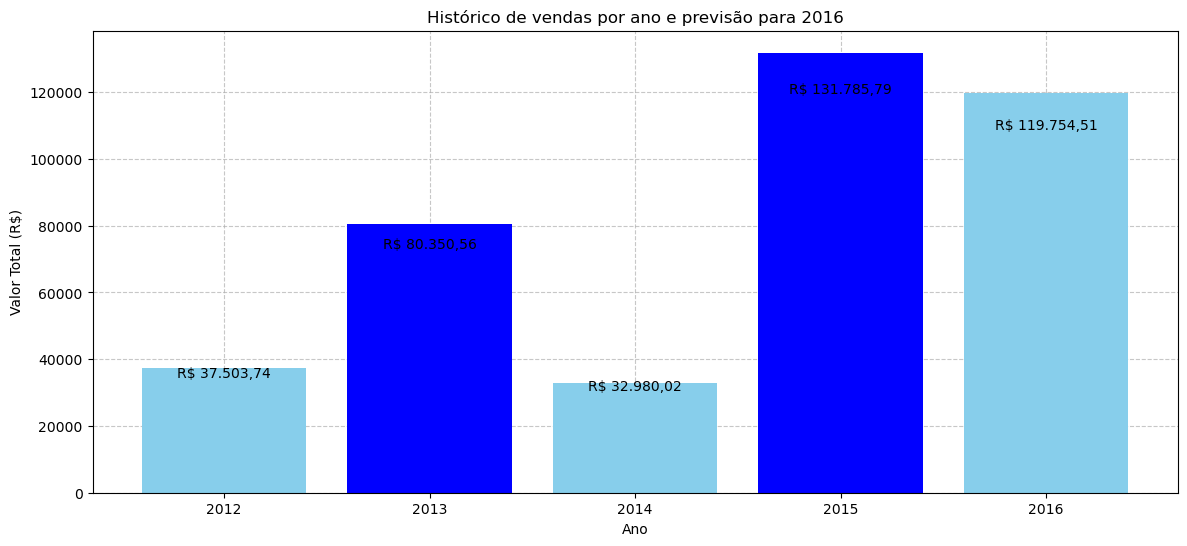

In [103]:
import locale
# Configurando o locale para o padrão monetário brasileiro
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
# Agrupando os dados por ano e somando os valores de cada ano
dados_agrupados = seriecomprevisao.groupby('Venda_Acumul_Anual')['Valor_Anual_Venda'].sum()
# Criando uma lista de cores alternadas
cores = ['skyblue', 'blue'] * (len(dados_agrupados) // 2 + 1)
# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(14, 6))
barras = ax.bar(dados_agrupados.index, dados_agrupados.values, color=cores[:len(dados_agrupados)])
# Adicionando os valores dentro das barras, formatados como moeda brasileira
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,           # Posição no eixo X
        altura - (altura * 0.1),                         # Posição no eixo Y
        locale.currency(altura, grouping=True),          # Texto formatado como moeda
        ha='center', va='bottom', color='black'          # Alinhamento e cor
    )
# Personalizando o gráfico
plt.title('Histórico de vendas por ano e previsão para 2016')
plt.xlabel('Ano')
plt.ylabel('Valor Total (R$)')
#Ajustando a grid para ficar atrás das linhas
ax.set_axisbelow(True)  # Coloca as grades atrás dos dados
plt.grid(True, linestyle='--', alpha=0.7)  # Ajusta o estilo e a opacidade da grade
# Exibe o gráfico
plt.show()

In [104]:
previsoes_originais['Data Venda'] = previsoes_originais.index
previsoes_originais.reset_index(drop=True, inplace=True)
previsoes_originais

,ValorVenda,Data Venda
0,11866.310982,2016-01-31
1,8195.579110,2016-02-29
2,11659.949077,2016-03-31
3,8350.581939,2016-04-30
4,11475.865651,2016-05-31
5,8492.067649,2016-06-30
6,11311.484855,2016-07-31
7,8621.057564,2016-08-31
8,11164.558858,2016-09-30
9,8738.527331,2016-10-31


In [105]:
# Convertendo a coluna 'Data Venda' para o formato datetime (se ainda não estiver)
previsoes_originais['Data Venda'] = pd.to_datetime(previsoes_originais['Data Venda'])
previsoes_originais

,ValorVenda,Data Venda
0,11866.310982,2016-01-31
1,8195.579110,2016-02-29
2,11659.949077,2016-03-31
3,8350.581939,2016-04-30
4,11475.865651,2016-05-31
5,8492.067649,2016-06-30
6,11311.484855,2016-07-31
7,8621.057564,2016-08-31
8,11164.558858,2016-09-30
9,8738.527331,2016-10-31


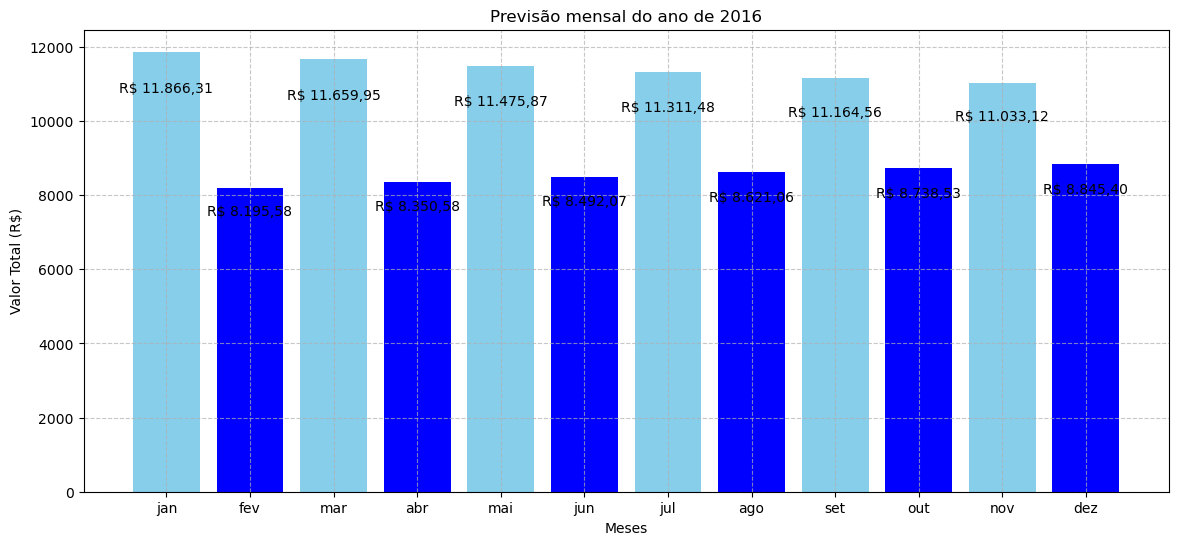

In [106]:
import locale
# Configurando o locale para o padrão monetário brasileiro
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
# Convertendo a coluna 'Data Venda' para o formato datetime
previsoes_originais['Data Venda'] = pd.to_datetime(previsoes_originais['Data Venda'])

# Extraindo apenas o mês para exibição no gráfico
previsoes_originais['Mes'] = previsoes_originais['Data Venda'].dt.strftime('%b')

# Criando uma lista de cores alternadas
cores = ['skyblue', 'blue'] * (len(previsoes_originais) // 2 + 1)

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(14, 6))
barras = ax.bar(previsoes_originais['Mes'], previsoes_originais['ValorVenda'], color=cores[:len(previsoes_originais)])

# Adicionando os valores dentro das barras, formatados como moeda brasileira
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,           # Posição no eixo X
        altura - (altura * 0.1),                         # Posição no eixo Y
        locale.currency(altura, grouping=True),          # Texto formatado como moeda
        ha='center', va='bottom', color='black'          # Alinhamento e cor
    )

# Personalizando o gráfico
plt.title('Previsão mensal do ano de 2016')
plt.xlabel('Meses')
plt.ylabel('Valor Total (R$)')
plt.grid(True, linestyle='--', alpha=0.7)  # Ajusta o estilo e a opacidade da grade

# Exibe o gráfico
plt.show()

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# **AVALIANDO O DESEMPENHO**

In [109]:
# Lista com valores reais de 2015
lista = [
    '10305.57',
    '14372.22',
    '17812.00',
    '16902.45',
    '19898.00',
    '13103.87',
    '14581.00',
    '10455.00',
    '14942.00',
    '9147.34',
    '15519.34',
    '8026.00']
valores_reais = pd.DataFrame(lista, columns = ['valores reais'])
print(valores_reais)


   valores reais
0       10305.57
1       14372.22
2       17812.00
3       16902.45
4       19898.00
5       13103.87
6       14581.00
7       10455.00
8       14942.00
9        9147.34
10      15519.34
11       8026.00


In [110]:
auto = previsoes_originais.iloc[0:12].reset_index(drop=True)
auto

,ValorVenda,Data Venda,Mes
0,11866.310982,2016-01-31,jan
1,8195.579110,2016-02-29,fev
2,11659.949077,2016-03-31,mar
3,8350.581939,2016-04-30,abr
4,11475.865651,2016-05-31,mai
5,8492.067649,2016-06-30,jun
6,11311.484855,2016-07-31,jul
7,8621.057564,2016-08-31,ago
8,11164.558858,2016-09-30,set
9,8738.527331,2016-10-31,out


In [111]:
auto = auto.rename(columns={'ValorVenda': 'Previsão_SARIMA'})
auto

,Previsão_SARIMA,Data Venda,Mes
0,11866.310982,2016-01-31,jan
1,8195.579110,2016-02-29,fev
2,11659.949077,2016-03-31,mar
3,8350.581939,2016-04-30,abr
4,11475.865651,2016-05-31,mai
5,8492.067649,2016-06-30,jun
6,11311.484855,2016-07-31,jul
7,8621.057564,2016-08-31,ago
8,11164.558858,2016-09-30,set
9,8738.527331,2016-10-31,out


In [112]:
desempenho = pd.concat([valores_reais, auto],axis=1)
desempenho

,valores reais,Previsão_SARIMA,Data Venda,Mes
0,10305.57,11866.310982,2016-01-31,jan
1,14372.22,8195.579110,2016-02-29,fev
2,17812.00,11659.949077,2016-03-31,mar
3,16902.45,8350.581939,2016-04-30,abr
4,19898.00,11475.865651,2016-05-31,mai
5,13103.87,8492.067649,2016-06-30,jun
6,14581.00,11311.484855,2016-07-31,jul
7,10455.00,8621.057564,2016-08-31,ago
8,14942.00,11164.558858,2016-09-30,set
9,9147.34,8738.527331,2016-10-31,out


# **ERRO MÉDIO ABSOLUTO (MAE)**

In [114]:
print('ERRO MÉDIO ABSOLUTO (MAE)') # media_valor_venda
mae_sarima = mean_absolute_error(desempenho['valores reais'], desempenho['Previsão_SARIMA'])
print('SARIMA: {:.2f}'.format(mae_sarima))

try:
    print('MÉDIA: {:.2f}'.format(media_valor_venda))
except NameError:
    print('Erro: A variável "media_valor_venda" não foi definida.')
    
resultado = (lambda mae_sarima, media: 'Modelo aprovado' if mae_sarima < media else 'Modelo não aprovado')(mae_sarima, media_valor_venda)
print(resultado)

ERRO MÉDIO ABSOLUTO (MAE)
SARIMA: 4172.55
MÉDIA: 5887.92
Modelo aprovado


# **ERRO QUADRÁTICO MÉDIO (MSE)**

In [116]:
print('ERRO QUADRÁTICO MÉDIO (MSE)')
mse_sarima = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_SARIMA'])
print('SARIMA: {:.2f}'.format(mse_sarima))

def calcular_media_valor_venda(media_valor_venda):
    media_valor_venda_ao_quadrado = media_valor_venda ** 2
    return media_valor_venda_ao_quadrado

try:
    media_ao_quadrado = calcular_media_valor_venda(media_valor_venda)
    print('MÉDIA: {:.2f}'.format(media_ao_quadrado))
    
    percentual_mse = (mse_sarima / media_ao_quadrado) * 100
    print('%: {:.2f}'.format(percentual_mse))

    if percentual_mse < 10:
        print('Modelo excelente')
    elif percentual_mse < 30:
        print('Modelo bom')
    elif percentual_mse < 50:
        print('Modelo razoável')
    else:
        print('Modelo rejeitado')

except NameError:
    print('Erro: A variável "media_valor_venda" não foi definida.')


ERRO QUADRÁTICO MÉDIO (MSE)
SARIMA: 24421407.90
MÉDIA: 34667589.66
%: 70.44
Modelo rejeitado


# **RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)**

In [118]:
from sklearn.metrics import mean_squared_error
print('RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)')
mse_sarima = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_SARIMA'])
rmse_sarima = np.sqrt(mse_sarima)
print('SARIMA: {:.2f}'.format(rmse_sarima))

try:
    print('MÉDIA: {:.2f}'.format(media_valor_venda))
except NameError:
    print('Erro: A variável "media_valor_venda" não foi definida.')

resultado = (lambda rmse_sarima, media: 'Modelo aprovado' if rmse_sarima < media else 'Modelo não aprovado')(rmse_sarima, media_valor_venda)
print(resultado)


RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)
SARIMA: 4941.80
MÉDIA: 5887.92
Modelo aprovado


# **ERRO PERCENTUAL MÉDIA ABSOLUTO (MAPE)**

In [120]:
print('ERRO PERCENTUAL MÉDIA ABSOLUTO (MAPE)')
desempenho['valores reais'] = pd.to_numeric(desempenho['valores reais'], errors='coerce')
mape_sarima = np.mean(np.abs((desempenho['valores reais'] - desempenho['Previsão_SARIMA']) / desempenho['valores reais'])) * 100
print('SARIMA: {:.2f}%'.format(mape_sarima))

try:
    print('MÉDIA: {:.2f}'.format(media_valor_venda))
except NameError:
    print('Erro: A variável "media_valor_venda" não foi definida.')
    
if mape_sarima < 10: 
    print('Modelo excelente')
elif mape_sarima < 20: 
    print('Modelo bom')
elif mape_sarima < 50:
    print('Modelo razoável') 
else: 
    print('Modelo ruim')


ERRO PERCENTUAL MÉDIA ABSOLUTO (MAPE)
SARIMA: 27.47%
MÉDIA: 5887.92
Modelo razoável
